In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score  
import os
from sklearn.datasets.samples_generator import make_blobs  
from sklearn import preprocessing 
import csv 
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler



from pandas.core.frame import DataFrame
% matplotlib inline

In [5]:
np.set_printoptions(suppress=True)

In [50]:
data = pd.read_csv('C:/Users/Yee Shen/Desktop/source/41features.csv')
data.head()

,userid,contactlv_1,contactlv_2,contactlv_3,contactlv_4,contactlv_5,fanslv_1,fanslv_2,fanslv_3,fanslv_4,...,nonc_avcomment,nonc_avlike,nonc_avrepost,fans,follow,av_re_repost,av_re_comment,av_re_like,repost_weibo,like_weibo
0,1,384,60,15,7,30,250,78,34,10,...,590.941967,1067.052535,155.434942,3775598,316,8280.339718,3551.350806,15740.777722,679,1343
1,2,436,61,22,8,33,304,119,40,18,...,640.866385,766.106088,160.280289,4636567,517,3510.262777,0.000000,3268.334137,1414,773
2,3,387,88,37,16,67,295,138,43,11,...,82.825139,406.929559,98.521813,4348114,393,1403.014392,1060.471216,5901.438254,1164,1062
3,4,856,178,52,34,74,817,246,57,15,...,27.108265,280.873852,1711.599323,981916,367,1788.214854,408.919098,1566.927695,1052,2005
4,5,652,146,59,24,39,605,161,54,15,...,9.290556,160.876563,23.550118,778999,751,222.798990,114.159870,499.844821,2285,538


In [51]:
len(data)

108

In [52]:
data.columns

Index(['userid', 'contactlv_1', 'contactlv_2', 'contactlv_3', 'contactlv_4',
       'contactlv_5', 'fanslv_1', 'fanslv_2', 'fanslv_3', 'fanslv_4',
       'fanslv_5', 'followslv_1', 'followslv_2', 'followslv_3', 'followslv_4',
       'overlaplv_1', 'overlaplv_2', 'overlaplv_3', 'overlaplv_4',
       'overlaplv_5', 'weibolv_1', 'weibolv_2', 'weibolv_3', 'weibolv_4',
       'new', 'new_avcomment', 'new_avlike', 'new_avrepost', 'comm_prize',
       'like_prize', 'repo_prize', 'nonc', 'nonc_avcomment', 'nonc_avlike',
       'nonc_avrepost', 'fans', 'follow', 'av_re_repost', 'av_re_comment',
       'av_re_like', 'repost_weibo', 'like_weibo'],
      dtype='object')

In [85]:
a = data[[ 'contactlv_1', 'contactlv_2', 'contactlv_3', 'contactlv_4',
       'contactlv_5', 'fanslv_1', 'fanslv_2', 'fanslv_3', 'fanslv_4',
       'fanslv_5', 'followslv_1', 'followslv_2', 'followslv_3', 'followslv_4',
       'overlaplv_1', 'overlaplv_2', 'overlaplv_3', 'overlaplv_4',
       'overlaplv_5', 'weibolv_1', 'weibolv_2', 'weibolv_3', 'weibolv_4',
       'new', 'new_avcomment', 'new_avlike', 'new_avrepost', 'comm_prize',
       'like_prize', 'repo_prize', 'nonc', 'nonc_avcomment', 'nonc_avlike',
       'nonc_avrepost', 'fans', 'follow', 'av_re_repost', 'av_re_comment',
       'av_re_like', 'repost_weibo', 'like_weibo']]
b = np.array(a.astype(float))
minMax = MinMaxScaler()
X = minMax.fit_transform(b)
#std = StandardScaler()
#X = std.fit_transform(b)
scale = pd.DataFrame(X)
X


array([[0.18250951, 0.12320329, 0.0867052 , ..., 0.12905117, 0.16274604,
        0.30227324],
       [0.20722433, 0.12525667, 0.12716763, ..., 0.02665892, 0.33917427,
        0.17398154],
       [0.18393536, 0.18069815, 0.21387283, ..., 0.04827533, 0.27916467,
        0.23902768],
       ...,
       [0.69961977, 0.52156057, 0.52023121, ..., 0.02851431, 0.24675948,
        0.77807788],
       [0.51520913, 0.32443532, 0.24277457, ..., 0.00681402, 0.29380701,
        0.3587666 ],
       [0.10931559, 0.08008214, 0.02312139, ..., 0.03273251, 0.06096976,
        0.12288994]])

In [86]:
scale

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.182510,0.123203,0.086705,0.094595,0.135747,0.094733,0.214286,0.142857,0.104167,0.268398,...,0.173669,0.063872,0.034006,0.559516,0.173194,0.014746,0.102299,0.129051,0.162746,0.302273
1,0.207224,0.125257,0.127168,0.108108,0.149321,0.115195,0.326923,0.168067,0.187500,0.170996,...,0.188475,0.045794,0.035068,0.687503,0.284060,0.006250,0.000000,0.026659,0.339174,0.173982
2,0.183935,0.180698,0.213873,0.216216,0.303167,0.111785,0.379121,0.180672,0.114583,0.233766,...,0.022977,0.024217,0.021530,0.644624,0.215665,0.002497,0.030548,0.048275,0.279165,0.239028
3,0.406844,0.365503,0.300578,0.459459,0.334842,0.309587,0.675824,0.239496,0.156250,0.127706,...,0.006453,0.016645,0.375128,0.144223,0.201324,0.003183,0.011779,0.012691,0.252280,0.451272
4,0.309886,0.299795,0.341040,0.324324,0.176471,0.229254,0.442308,0.226891,0.156250,0.183983,...,0.001169,0.009436,0.005096,0.114059,0.413127,0.000395,0.003288,0.003931,0.548248,0.121089
5,0.062738,0.234086,0.109827,0.256757,0.149321,0.057598,0.321429,0.126050,0.052083,0.028139,...,0.053344,0.119718,1.000000,0.182773,0.183122,0.000459,0.010687,0.003333,0.183629,0.058969
6,0.490494,0.318275,0.364162,0.445946,0.217195,0.333081,0.634615,0.260504,0.125000,0.318182,...,0.149774,0.049331,0.018352,0.369718,0.385549,0.003759,0.032083,0.031521,0.274604,0.431465
7,0.258555,0.240246,0.173410,0.364865,0.226244,0.177719,0.637363,0.155462,0.072917,0.049784,...,0.054035,0.022315,0.099277,0.484380,0.242692,0.000457,0.006746,0.002566,0.270043,0.156651
8,0.233840,0.166324,0.236994,0.202703,0.149321,0.200834,0.082418,0.075630,0.104167,0.160173,...,0.031293,0.012200,0.005599,0.339524,0.417540,0.002554,0.009648,0.005980,0.344935,0.027009
9,0.084125,0.034908,0.028902,0.040541,0.058824,0.032967,0.098901,0.067227,0.062500,0.151515,...,0.792872,0.464825,0.138466,0.850558,0.098731,0.008787,0.065668,0.040673,0.050408,0.061220


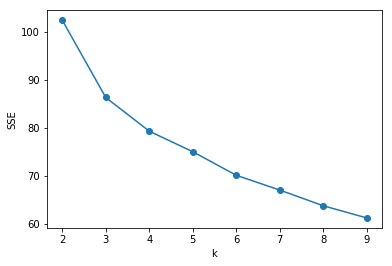

In [78]:
SSE = []
for k in range(2,10):  
    estimator = KMeans(n_clusters=k, max_iter=300, n_init=20, init='k-means++',n_jobs=-1)
    estimator.fit(X)  
    SSE.append(estimator.inertia_)  
X = range(2,10)  
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show()  

In [79]:
SSE

[102.38575143090637,
 86.32361853267349,
 79.31995814154651,
 75.05125785835558,
 70.15639968548567,
 67.08143994024164,
 63.8186848466329,
 61.28491922421375]

In [87]:
estimator = KMeans(n_clusters=6, max_iter=300, n_init=20, init='k-means++',n_jobs=-1)
estimator.fit(X)  
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

In [27]:
len(label_pred.tolist())

46470

In [88]:
data1 = data[['userid']]
data2 = pd.concat([data1, scale], axis=1)
lable_list = label_pred.tolist()
tmp = {"lable" : lable_list}
lable_data = DataFrame(tmp)
result = pd.concat([data2,lable_data],axis=1)
result

,userid,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,lable
0,1,0.182510,0.123203,0.086705,0.094595,0.135747,0.094733,0.214286,0.142857,0.104167,...,0.063872,0.034006,0.559516,0.173194,0.014746,0.102299,0.129051,0.162746,0.302273,2
1,2,0.207224,0.125257,0.127168,0.108108,0.149321,0.115195,0.326923,0.168067,0.187500,...,0.045794,0.035068,0.687503,0.284060,0.006250,0.000000,0.026659,0.339174,0.173982,2
2,3,0.183935,0.180698,0.213873,0.216216,0.303167,0.111785,0.379121,0.180672,0.114583,...,0.024217,0.021530,0.644624,0.215665,0.002497,0.030548,0.048275,0.279165,0.239028,2
3,4,0.406844,0.365503,0.300578,0.459459,0.334842,0.309587,0.675824,0.239496,0.156250,...,0.016645,0.375128,0.144223,0.201324,0.003183,0.011779,0.012691,0.252280,0.451272,0
4,5,0.309886,0.299795,0.341040,0.324324,0.176471,0.229254,0.442308,0.226891,0.156250,...,0.009436,0.005096,0.114059,0.413127,0.000395,0.003288,0.003931,0.548248,0.121089,2
5,6,0.062738,0.234086,0.109827,0.256757,0.149321,0.057598,0.321429,0.126050,0.052083,...,0.119718,1.000000,0.182773,0.183122,0.000459,0.010687,0.003333,0.183629,0.058969,5
6,7,0.490494,0.318275,0.364162,0.445946,0.217195,0.333081,0.634615,0.260504,0.125000,...,0.049331,0.018352,0.369718,0.385549,0.003759,0.032083,0.031521,0.274604,0.431465,0
7,8,0.258555,0.240246,0.173410,0.364865,0.226244,0.177719,0.637363,0.155462,0.072917,...,0.022315,0.099277,0.484380,0.242692,0.000457,0.006746,0.002566,0.270043,0.156651,5
8,9,0.233840,0.166324,0.236994,0.202703,0.149321,0.200834,0.082418,0.075630,0.104167,...,0.012200,0.005599,0.339524,0.417540,0.002554,0.009648,0.005980,0.344935,0.027009,2
9,10,0.084125,0.034908,0.028902,0.040541,0.058824,0.032967,0.098901,0.067227,0.062500,...,0.464825,0.138466,0.850558,0.098731,0.008787,0.065668,0.040673,0.050408,0.061220,5


In [89]:
result['lable'].value_counts()


1    43
2    31
5    21
0     9
3     3
4     1
Name: lable, dtype: int64

In [84]:
result.to_csv('cele_kmeans3.csv',encoding='utf_8_sig',index=0)

In [29]:
centroids

array([[-0.08997412, -0.27238186, -0.06694177, -0.1074909 ],
       [ 3.49374268,  0.30602402, 14.74067053,  0.81081864],
       [ 0.45897299,  0.86446824,  1.1192765 ,  9.17126222],
       [ 7.11442148,  0.22363175,  1.18161482,  1.03524038],
       [-0.0295079 ,  1.91140814, -0.01771289,  0.19953663]])

In [50]:
Scores = []  
for k in range(2,9):  
    estimator = KMeans(n_clusters=k)  
    estimator.fit(alter[['length', 'follow','fans', 'weibo']])  
    Scores.append(silhouette_score(alter[['length', 'follow','fans', 'weibo']],estimator.labels_,metric='euclidean'))  
X = range(2,9)  
plt.xlabel('k')  
plt.ylabel('轮廓系数')  
plt.plot(X,Scores,'o-')  
plt.show()  

MemoryError: 

[]